Dataset Shape: (1000000, 6)

First 5 rows:
   student_id  weekly_self_study_hours  attendance_percentage  \
0           1                     18.5                   95.6   
1           2                     14.0                   80.0   
2           3                     19.5                   86.3   
3           4                     25.7                   70.2   
4           5                     13.4                   81.9   

   class_participation  total_score grade  
0                  3.8         97.9     A  
1                  2.5         83.9     B  
2                  5.3        100.0     A  
3                  7.0        100.0     A  
4                  6.9         92.0     A  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   wee

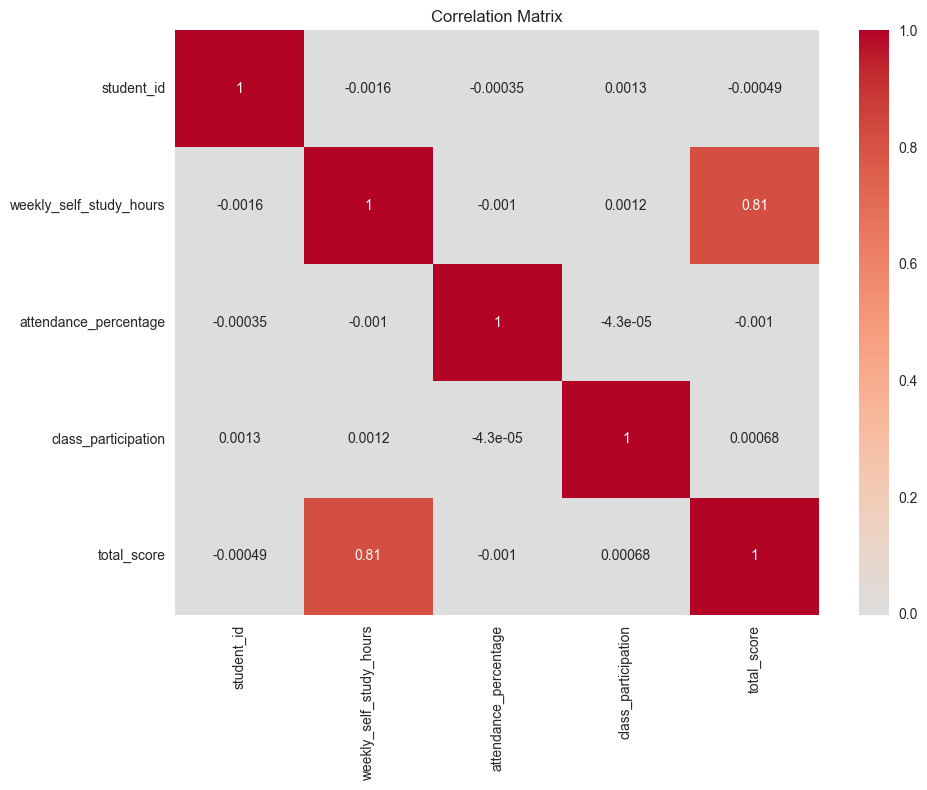

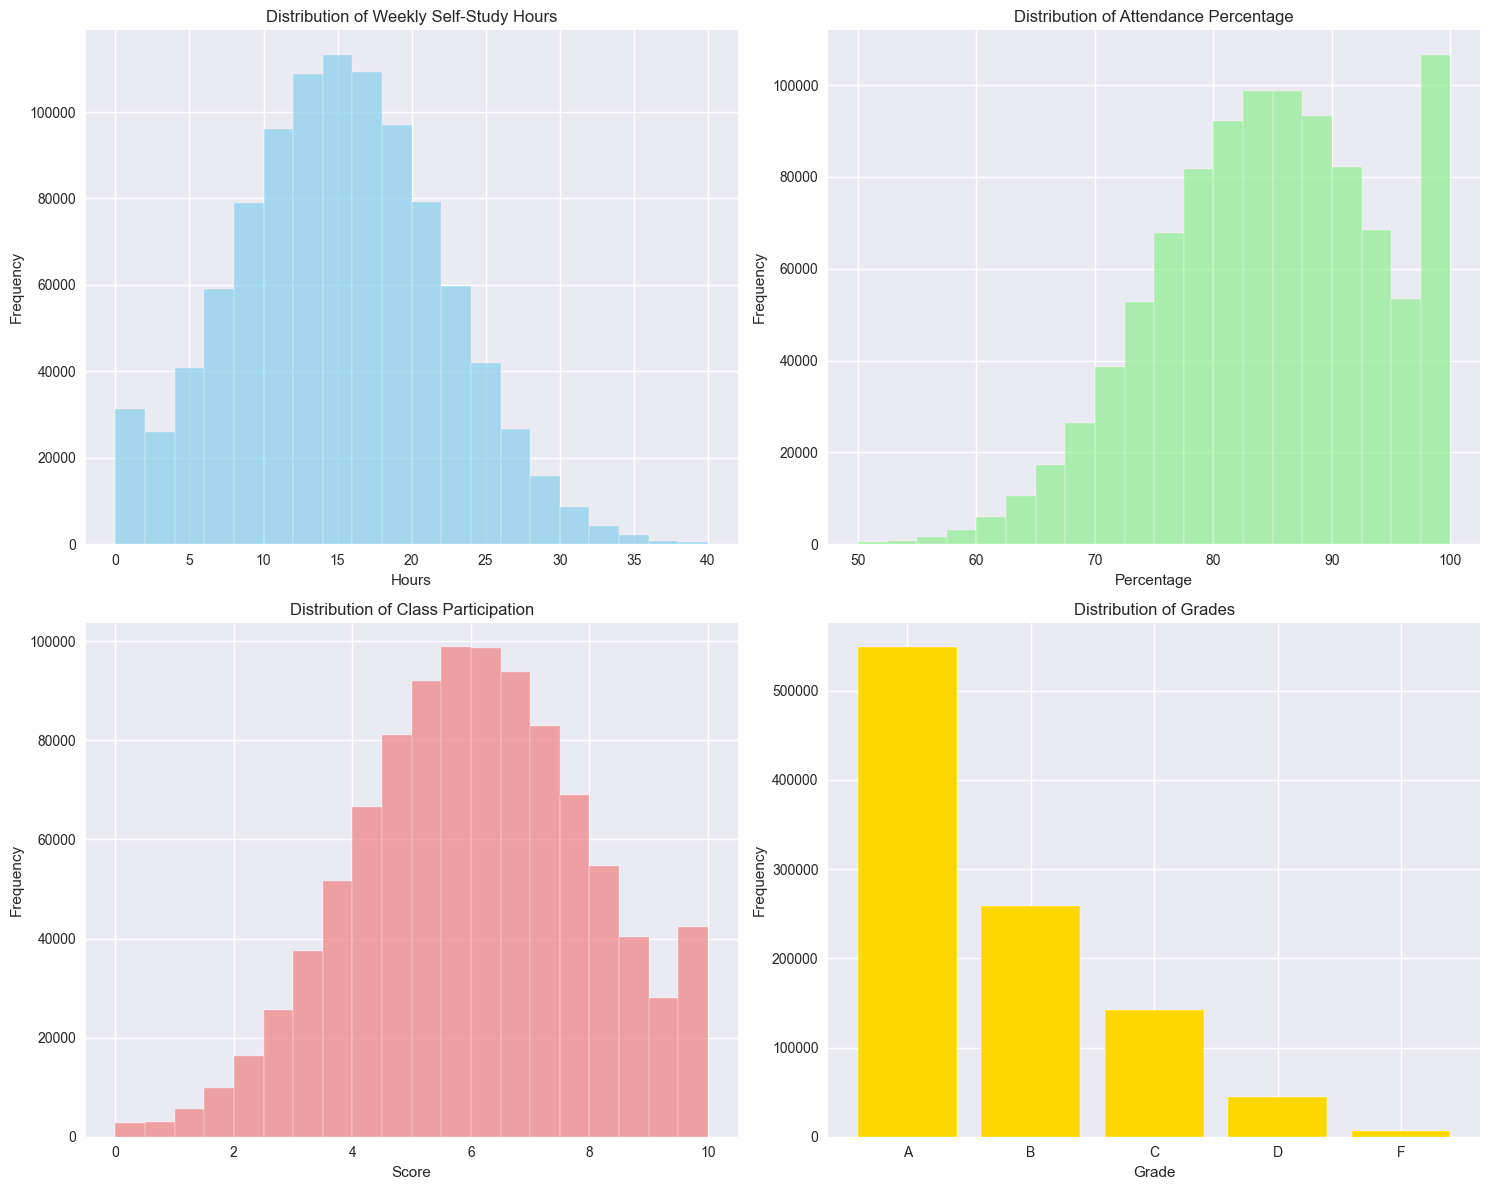

Grade encoding mapping:
A: 0
B: 1
C: 2
D: 3
F: 4
Features shape: (1000000, 3)
Target shape: (1000000,)

EXPERIMENT 1: Test Size = 0.2, Train Size = 0.8

--- Decision Tree ---
Accuracy: 0.6089
Precision: 0.6055
Recall: 0.6089
F1-Score: 0.6072

--- Random Forest ---
Accuracy: 0.6448
Precision: 0.6368
Recall: 0.6448
F1-Score: 0.6405

--- KNN ---
Accuracy: 0.6551
Precision: 0.6366
Recall: 0.6551
F1-Score: 0.6437

EXPERIMENT 2: Test Size = 0.25, Train Size = 0.75

--- Decision Tree ---
Accuracy: 0.6098
Precision: 0.6068
Recall: 0.6098
F1-Score: 0.6082

--- Random Forest ---
Accuracy: 0.6442
Precision: 0.6360
Recall: 0.6442
F1-Score: 0.6398

--- KNN ---
Accuracy: 0.6544
Precision: 0.6357
Recall: 0.6544
F1-Score: 0.6429

EXPERIMENT 3: Test Size = 0.3, Train Size = 0.7

--- Decision Tree ---
Accuracy: 0.6087
Precision: 0.6057
Recall: 0.6087
F1-Score: 0.6072

--- Random Forest ---
Accuracy: 0.6448
Precision: 0.6360
Recall: 0.6448
F1-Score: 0.6400

--- KNN ---
Accuracy: 0.6542
Precision: 0.6355


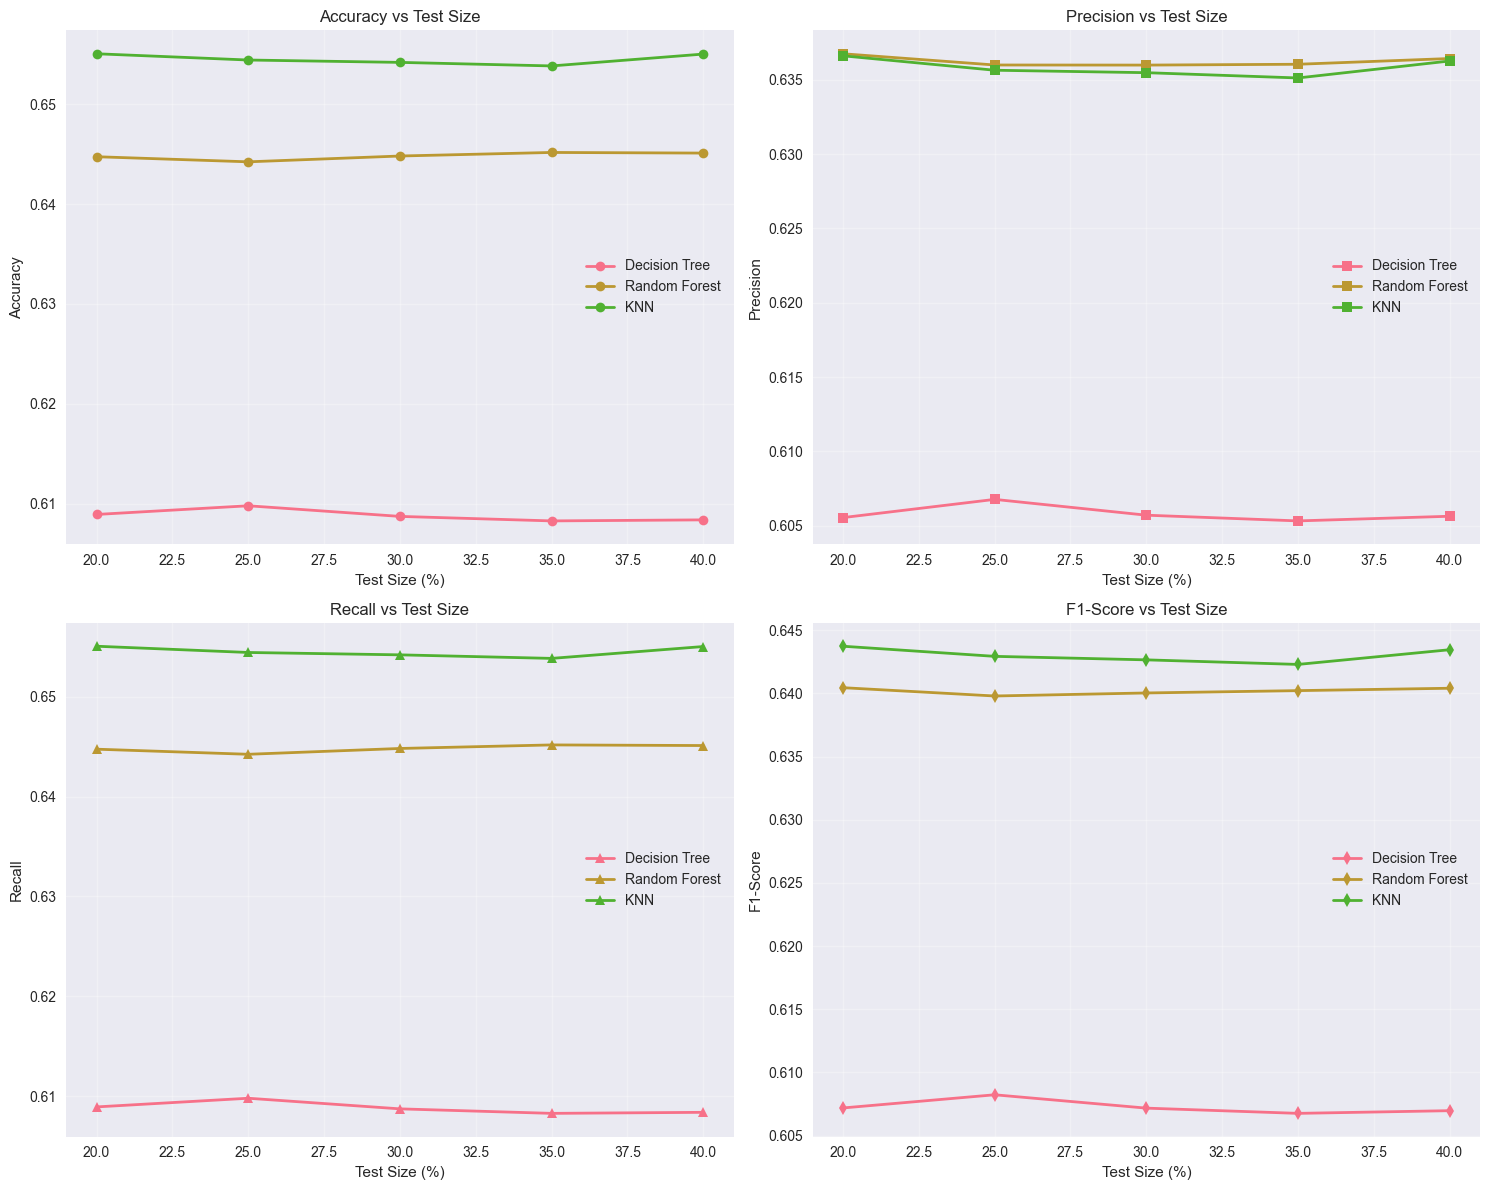


AVERAGE PERFORMANCE ACROSS ALL EXPERIMENTS
               Accuracy  Precision  Recall  F1_Score
Algorithm                                           
Decision Tree    0.6088     0.6058  0.6088    0.6073
KNN              0.6545     0.6358  0.6545    0.6430
Random Forest    0.6448     0.6363  0.6448    0.6402

Best performing model: KNN

DETAILED ANALYSIS FOR KNN

Detailed Classification Report:
              precision    recall  f1-score   support

           A       0.79      0.86      0.83    164593
           B       0.46      0.44      0.45     77452
           C       0.45      0.38      0.41     42594
           D       0.43      0.28      0.34     13500
           F       0.13      0.02      0.04      1861

    accuracy                           0.65    300000
   macro avg       0.45      0.40      0.41    300000
weighted avg       0.64      0.65      0.64    300000



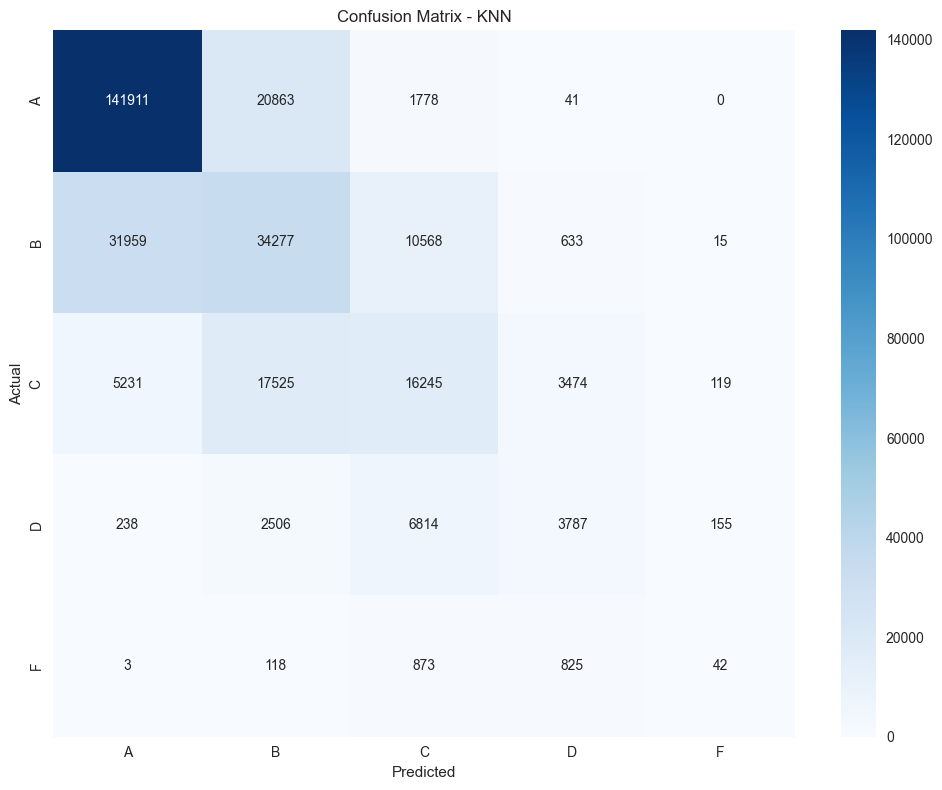


Results saved to 'student_performance_results.csv'

EXPERIMENT SUMMARY
Dataset: Student Performance Dataset
Total samples: 1000000
Features used: ['weekly_self_study_hours', 'attendance_percentage', 'class_participation']
Target variable: grade (encoded as 0-4)
Number of classes: 5
Algorithms tested: ['Decision Tree', 'Random Forest', 'KNN']
Best performing algorithm: KNN
Best average F1-score: 0.6430


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('student_performance.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nGrade Distribution:")
print(df['grade'].value_counts())

# Data Preprocessing
# Since we have categorical 'grade' column, we need to encode it for classification
# But first, let's check the correlation between features

# Correlation matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Feature distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Weekly self-study hours distribution
axes[0,0].hist(df['weekly_self_study_hours'], bins=20, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Weekly Self-Study Hours')
axes[0,0].set_xlabel('Hours')
axes[0,0].set_ylabel('Frequency')

# Attendance percentage distribution
axes[0,1].hist(df['attendance_percentage'], bins=20, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Distribution of Attendance Percentage')
axes[0,1].set_xlabel('Percentage')
axes[0,1].set_ylabel('Frequency')

# Class participation distribution
axes[1,0].hist(df['class_participation'], bins=20, alpha=0.7, color='lightcoral')
axes[1,0].set_title('Distribution of Class Participation')
axes[1,0].set_xlabel('Score')
axes[1,0].set_ylabel('Frequency')

# Grade distribution
grade_counts = df['grade'].value_counts()
axes[1,1].bar(grade_counts.index, grade_counts.values, color='gold')
axes[1,1].set_title('Distribution of Grades')
axes[1,1].set_xlabel('Grade')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Prepare data for machine learning
# Encode the target variable (grade)
label_encoder = LabelEncoder()
df['grade_encoded'] = label_encoder.fit_transform(df['grade'])

print("Grade encoding mapping:")
for i, grade in enumerate(label_encoder.classes_):
    print(f"{grade}: {i}")

# Define features and target variable
# We'll use study hours, attendance, and participation to predict grade
X = df[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]
y = df['grade_encoded']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Initialize results storage
results = []

# Define different test sizes for experiments
test_sizes = [0.2, 0.25, 0.3, 0.35, 0.4]

# Experiment with different train-test splits
for i, test_size in enumerate(test_sizes, 1):
    print(f"\n{'='*50}")
    print(f"EXPERIMENT {i}: Test Size = {test_size}, Train Size = {1-test_size}")
    print(f"{'='*50}")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Scale features for KNN (Decision Tree and Random Forest don't require scaling)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():
        print(f"\n--- {model_name} ---")

        # Use scaled data for KNN, original for others
        if model_name == 'KNN':
            X_train_used = X_train_scaled
            X_test_used = X_test_scaled
        else:
            X_train_used = X_train
            X_test_used = X_test

        # Train the model
        model.fit(X_train_used, y_train)

        # Make predictions
        y_pred = model.predict(X_test_used)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Store results
        results.append({
            'Algorithm': model_name,
            'Iteration': i,
            'Number_of_features': X.shape[1],
            'Number_of_targets': len(np.unique(y)),
            'Train_Size_%': (1-test_size)*100,
            'Test_Size_%': test_size*100,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1_Score': f1
        })

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results in table format
print("\n" + "="*100)
print("FINAL RESULTS TABLE")
print("="*100)

# Create a formatted table similar to the required format
table_data = []
for algorithm in ['Decision Tree', 'Random Forest', 'KNN']:
    algorithm_results = results_df[results_df['Algorithm'] == algorithm]
    for _, row in algorithm_results.iterrows():
        table_data.append([
            algorithm,
            int(row['Iteration']),
            int(row['Number_of_features']),
            int(row['Number_of_targets']),
            f"{row['Train_Size_%']:.1f}",
            f"{row['Test_Size_%']:.1f}",
            f"{row['Accuracy']:.4f}",
            f"{row['Precision']:.4f}",
            f"{row['Recall']:.4f}",
            f"{row['F1_Score']:.4f}"
        ])

# Create and display the results table
columns = ['Algorithm', 'Iteration', 'Features', 'Targets', 'Train%', 'Test%',
           'Accuracy', 'Precision', 'Recall', 'F1-Score']
results_table = pd.DataFrame(table_data, columns=columns)
print(results_table.to_string(index=False))

# Visualize the results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
for algorithm in results_df['Algorithm'].unique():
    algorithm_data = results_df[results_df['Algorithm'] == algorithm]
    axes[0,0].plot(algorithm_data['Test_Size_%'], algorithm_data['Accuracy'],
                   marker='o', label=algorithm, linewidth=2)
axes[0,0].set_title('Accuracy vs Test Size')
axes[0,0].set_xlabel('Test Size (%)')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Precision comparison
for algorithm in results_df['Algorithm'].unique():
    algorithm_data = results_df[results_df['Algorithm'] == algorithm]
    axes[0,1].plot(algorithm_data['Test_Size_%'], algorithm_data['Precision'],
                   marker='s', label=algorithm, linewidth=2)
axes[0,1].set_title('Precision vs Test Size')
axes[0,1].set_xlabel('Test Size (%)')
axes[0,1].set_ylabel('Precision')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Recall comparison
for algorithm in results_df['Algorithm'].unique():
    algorithm_data = results_df[results_df['Algorithm'] == algorithm]
    axes[1,0].plot(algorithm_data['Test_Size_%'], algorithm_data['Recall'],
                   marker='^', label=algorithm, linewidth=2)
axes[1,0].set_title('Recall vs Test Size')
axes[1,0].set_xlabel('Test Size (%)')
axes[1,0].set_ylabel('Recall')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# F1-Score comparison
for algorithm in results_df['Algorithm'].unique():
    algorithm_data = results_df[results_df['Algorithm'] == algorithm]
    axes[1,1].plot(algorithm_data['Test_Size_%'], algorithm_data['F1_Score'],
                   marker='d', label=algorithm, linewidth=2)
axes[1,1].set_title('F1-Score vs Test Size')
axes[1,1].set_xlabel('Test Size (%)')
axes[1,1].set_ylabel('F1-Score')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed analysis for the best performing model
# Find the best model based on average F1-score
model_performance = results_df.groupby('Algorithm').agg({
    'Accuracy': 'mean',
    'Precision': 'mean',
    'Recall': 'mean',
    'F1_Score': 'mean'
}).round(4)

print("\n" + "="*60)
print("AVERAGE PERFORMANCE ACROSS ALL EXPERIMENTS")
print("="*60)
print(model_performance)

best_model_name = model_performance['F1_Score'].idxmax()
print(f"\nBest performing model: {best_model_name}")

# Train the best model on the entire dataset with optimal parameters
print(f"\n{'='*50}")
print(f"DETAILED ANALYSIS FOR {best_model_name}")
print(f"{'='*50}")

# Use 70-30 split for detailed analysis
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale data if using KNN
if best_model_name == 'KNN':
    scaler_final = StandardScaler()
    X_train_final = scaler_final.fit_transform(X_train_final)
    X_test_final = scaler_final.transform(X_test_final)

# Train best model
best_model = models[best_model_name]
best_model.fit(X_train_final, y_train_final)

# Make predictions
y_pred_final = best_model.predict(X_test_final)

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test_final, y_pred_final,
                          target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_final, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance for tree-based models
if best_model_name in ['Decision Tree', 'Random Forest']:
    plt.figure(figsize=(10, 6))
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True)

    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

# Save results to CSV for reporting
results_df.to_csv('student_performance_results.csv', index=False)
print("\nResults saved to 'student_performance_results.csv'")

# Final summary
print("\n" + "="*80)
print("EXPERIMENT SUMMARY")
print("="*80)
print(f"Dataset: Student Performance Dataset")
print(f"Total samples: {len(df)}")
print(f"Features used: {list(X.columns)}")
print(f"Target variable: grade (encoded as 0-4)")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Algorithms tested: {list(models.keys())}")
print(f"Best performing algorithm: {best_model_name}")
print(f"Best average F1-score: {model_performance.loc[best_model_name, 'F1_Score']:.4f}")
print("="*80)